<a href="https://colab.research.google.com/github/TheDandyCodes/Deep-Learning/blob/main/Unit_2/keras_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An example of DCNN — LeNet

Adaptado de
https://learning.oreilly.com/library/view/deep-learning-with/9781787128422/592bcfab-9b3d-43df-8348-593769e8fde0.xhtml

En el enlace se encuentran los comentarios.

### Mnist
https://en.wikipedia.org/wiki/MNIST_database

In [1]:
# import the necessary packages
# Cambio a tensorflow 2.x
# En lugar de from keras import, from tensorflow.keras import
# ciertos subpaquetes del antiguo keras desaparacen o cambian de nombre
# ver lista siguiente

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")

# from keras import backend as K
from tensorflow.keras import backend as K
# from keras.models import Sequential
from tensorflow.keras.models import Sequential
# from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D
# from .keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
# from w.keras.layers.core import Activation
from tensorflow.keras.layers import Activation
# from keras.layers.core import Flatten
from tensorflow.keras.layers import Flatten
# from keras.layers.core import Dense
from tensorflow.keras.layers import Dense
# from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
# from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1671)  # for reproducibility
tf.random.set_seed(1671)

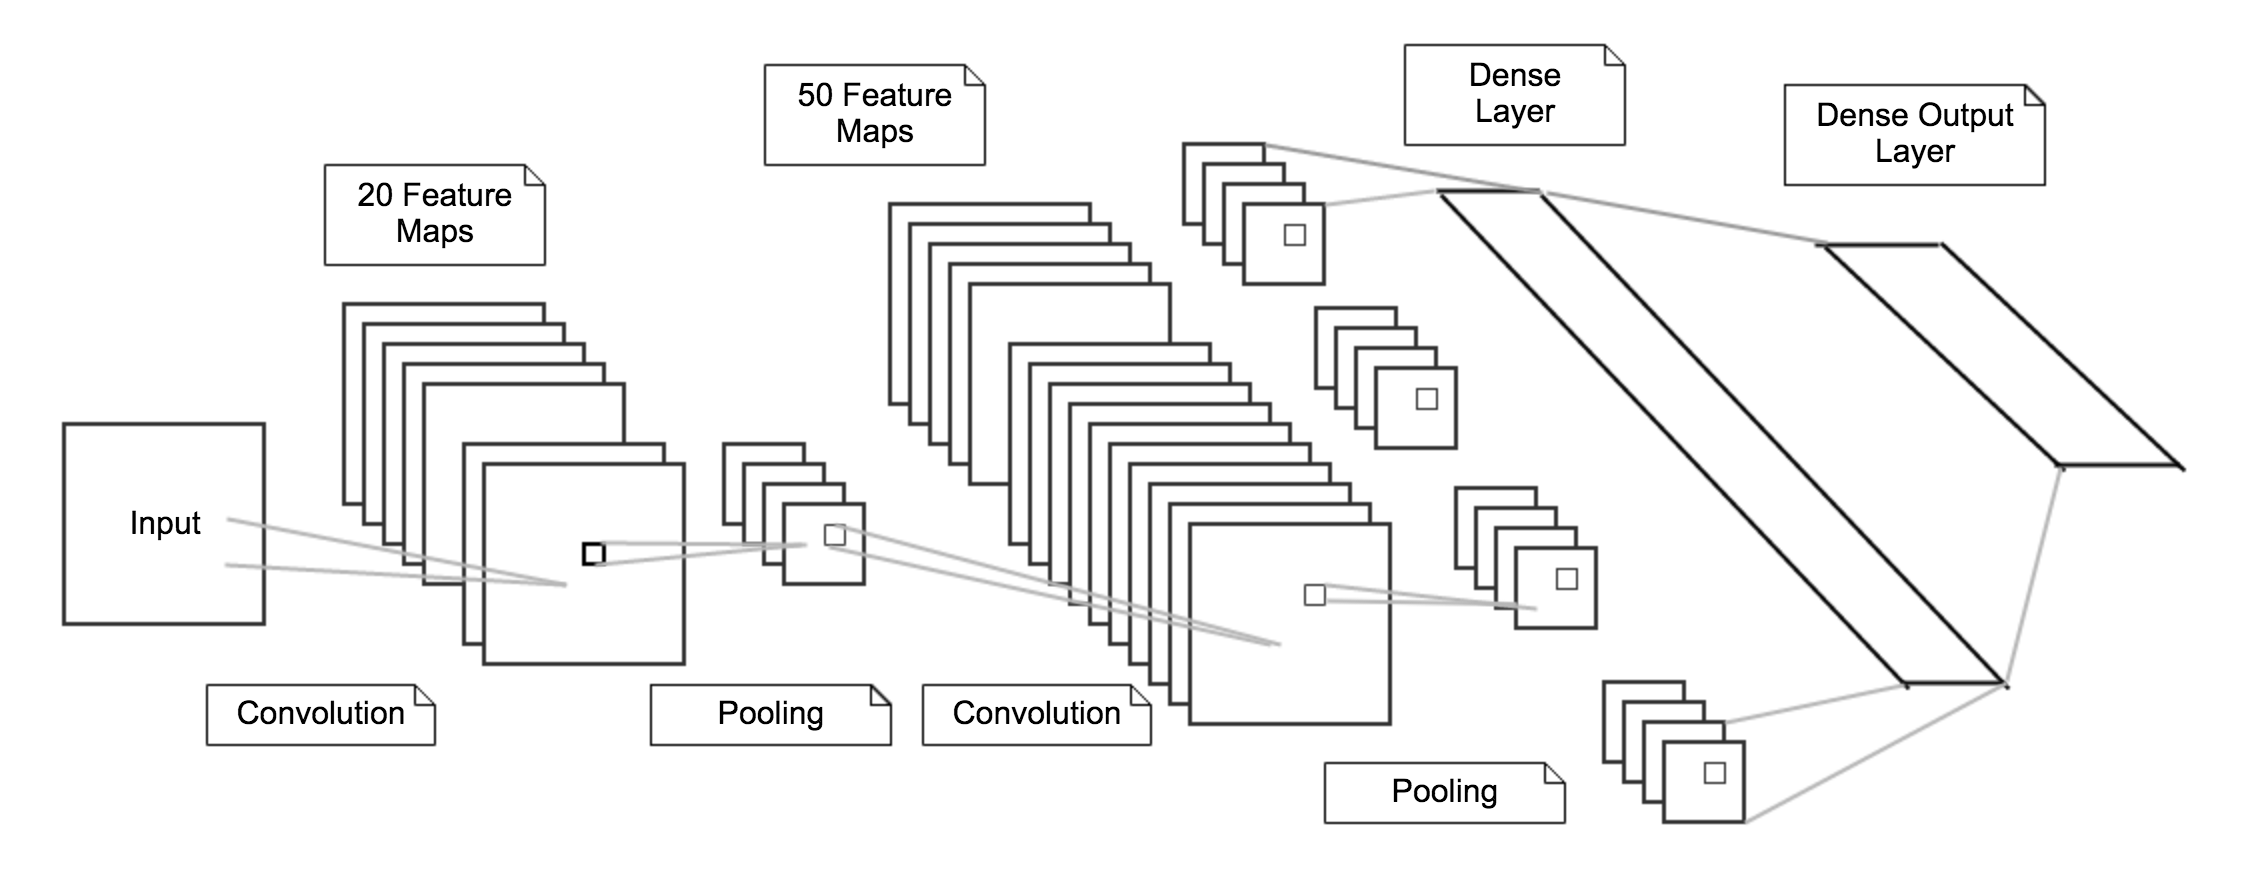

In [ ]:
from IPython.display import Image
Image("keras_LeNet.png")

In [3]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same",
            input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

In [4]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [5]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Para Keras >= 2.2.5 o tensorflow.keras
# set_image_data_format en lugar de set_image_dim_ordering
# th(theano) channel_first, tf(tensorflow) channel_last
# K.set_image_dim_ordering("th")
K.set_image_data_format("channels_first")

# reducimos el número de datos por velocidad
# si se tiene GPU o tiempo suficiente usar los totales
# para obtener mejores resultados
n_train = 60000
n_test = 10000
grey_levels = 255

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= grey_levels
X_test /= grey_levels

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:n_train, np.newaxis, :, :]
X_test = X_test[:n_test, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# cambio de imports en tensorflow.keras.utils
# y_train = np_utils.to_categorical(y_train[:n_train], NB_CLASSES)
# y_test = np_utils.to_categorical(y_test[:n_test], NB_CLASSES)
y_train = to_categorical(y_train[:n_train], NB_CLASSES)
y_test = to_categorical(y_test[:n_test], NB_CLASSES)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
60000 train samples
10000 test samples


In [6]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
    metrics=["accuracy"])

history = model.fit(X_train, y_train,
        batch_size=BATCH_SIZE, epochs=NB_EPOCH,
        verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 20, 28, 28)          │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 20, 28, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 14, 14)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 14, 14)          │          25,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 50, 14, 14)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 7, 7)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2450)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │       1,225,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,256,080 (4.79 MB)

 Trainable params: 1,256,080 (4.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8761 - loss: 0.4017 - val_accuracy: 0.9824 - val_loss: 0.0597
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9833 - loss: 0.0562 - val_accuracy: 0.9873 - val_loss: 0.0424
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9891 - loss: 0.0361 - val_accuracy: 0.9846 - val_loss: 0.0486
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9925 - loss: 0.0249 - val_accuracy: 0.9867 - val_loss: 0.0447
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9883 - val_loss: 0.0447
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9948 - loss: 0.0155 - val_accuracy: 0.9843 - val_loss: 0.0583
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9882 - val_loss: 0.0506
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9971 - loss: 0.0086 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


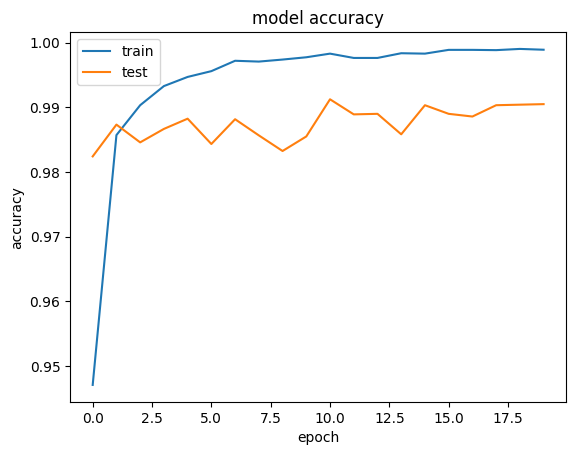

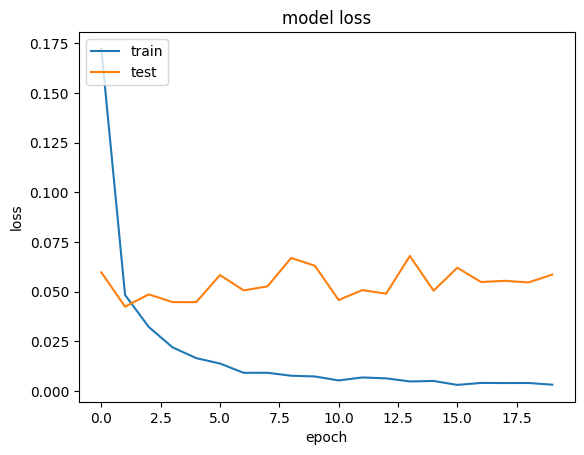

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2


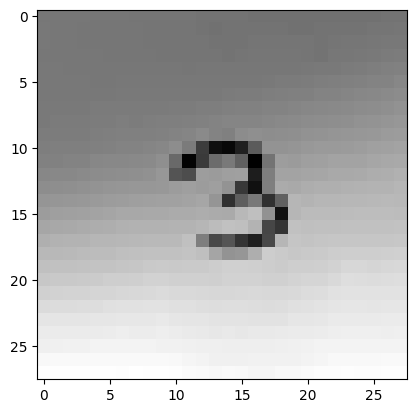

In [44]:
from PIL import Image

img = Image.open('/content/sample_data/IMG_7728.png').convert('L')
img = img.resize((IMG_ROWS, IMG_COLS))
img = np.array(img)
img = img.astype('float32')
img /= grey_levels
img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 28, 28)
img = np.expand_dims(img, axis=0) # Add channel dimension (1, 1, 28, 28)
preds = model.predict(img)
pred = np.argmax(preds)
print(pred)
# show img
plt.imshow(img[0, 0, :, :], cmap='gray')
plt.show()

In [56]:
preds = model.predict(X_test)
predicted_clases = preds.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


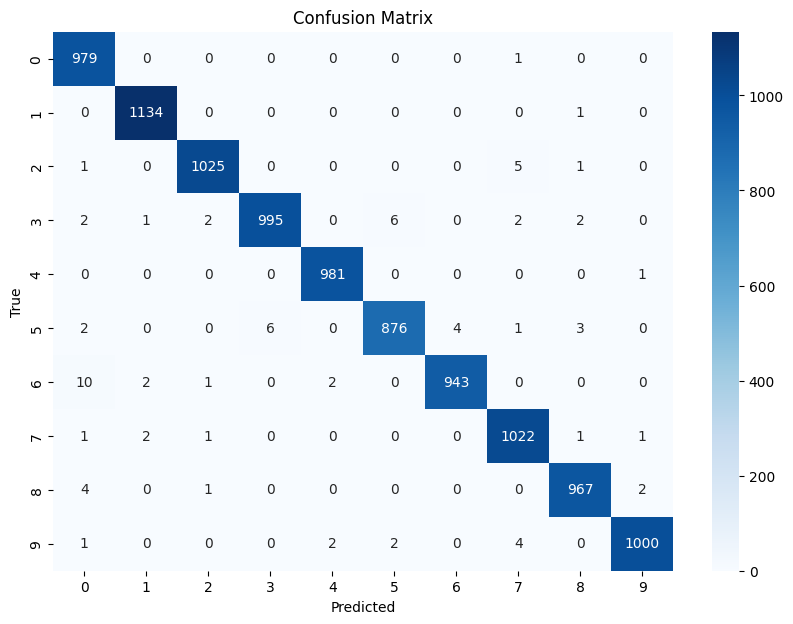

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.argmax(axis=1), predicted_clases)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), predicted_clases))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Liberar recursos GPU
# descomentar si se usa GPU

# from numba import cuda
# cuda.select_device(0)
# cuda.close()